In [130]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [118]:
def set_pandas_display_options() -> None:
    display = pd.options.display
    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = None

set_pandas_display_options()

### Weather

In [119]:
filename = './weather_data/training_data_with_weather_info_week_3.csv'
weather_df = pd.read_csv(filename)
weather_df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0,Afghanistan-,33.0,65.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0,Afghanistan-,33.0,65.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0,Afghanistan-,33.0,65.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0,Afghanistan-,33.0,65.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0,Afghanistan-,33.0,65.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


In [109]:
weather_df.columns

Index(['Id', 'Province_State', 'Country_Region', 'Date', 'ConfirmedCases',
       'Fatalities', 'country+province', 'Lat', 'Long', 'day_from_jan_first',
       'temp', 'min', 'max', 'stp', 'slp', 'dewp', 'rh', 'ah', 'wdsp', 'prcp',
       'fog'],
      dtype='object')

In [3]:
def plot_confirmed_by_day(country):
    plt.figure(figsize=(20, 10))
    df = weather_df[weather_df['Country_Region']==country]
    df = df.groupby(['Date']).agg({'ConfirmedCases':'sum','temp':'mean'}).reset_index()
    df['increase'] = df['ConfirmedCases'] - df['ConfirmedCases'].shift(1)
    sns.lineplot(data=df.set_index('Date')[['ConfirmedCases', 'increase']]).set_title('Time Series of COVID-19 cases in {}'.format(country),fontsize=20)
    plt.xticks(rotation=45)

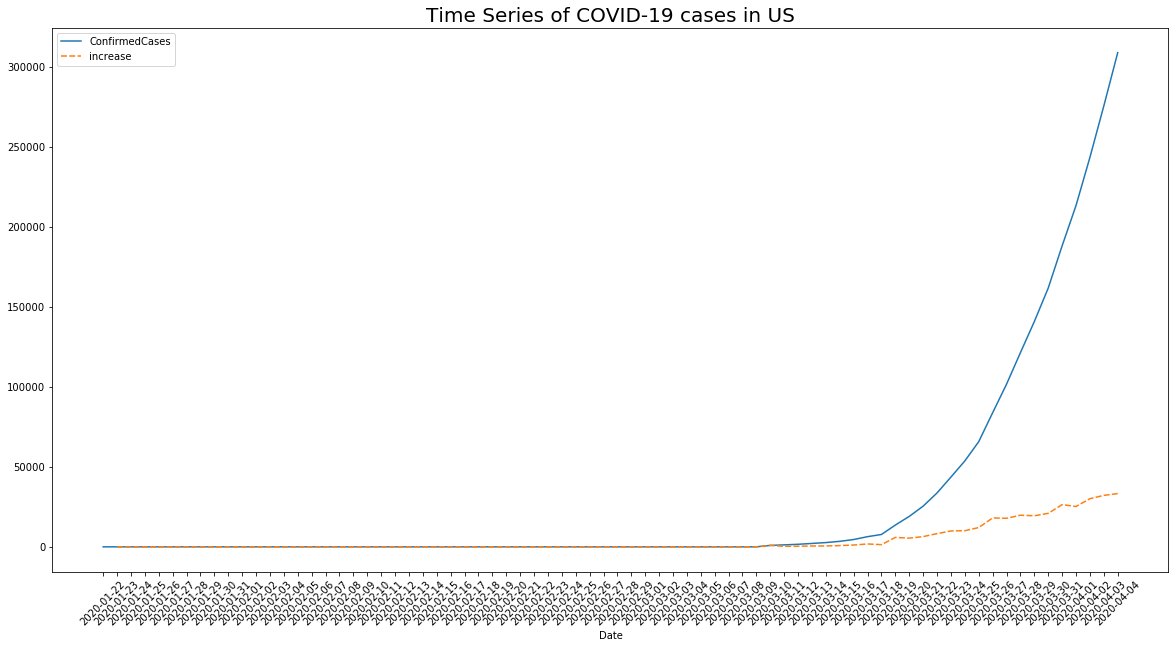

In [4]:
plot_confirmed_by_day('US')

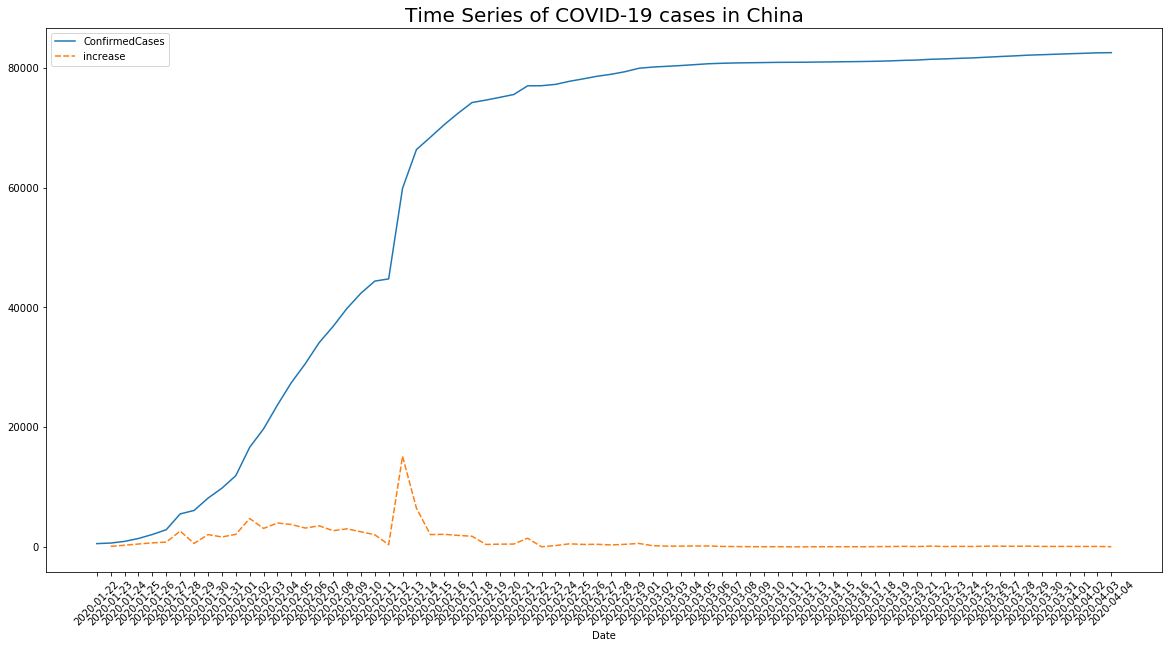

In [5]:
plot_confirmed_by_day('China')

In [156]:
def plot_temp_by_day(country):
    plt.figure(figsize=(20, 10))
    df = weather_df[weather_df['Country_Region']==country]
    df = df.groupby(['Date']).agg({'temp':'mean', 'min': 'min', 'max':'max'}).reset_index()
    ax = sns.lineplot(data=df.set_index('Date')[['temp', 'min', 'max']])
    ax.set_title('Time Series of temperature in {}'.format(country),fontsize=20)
    plt.xticks(rotation=45)
#     locator = mdates.AutoDateLocator()
#     locator.intervald[DAILY] = [5]
#     ax.xaxis.set_major_locator(locator())
#     ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

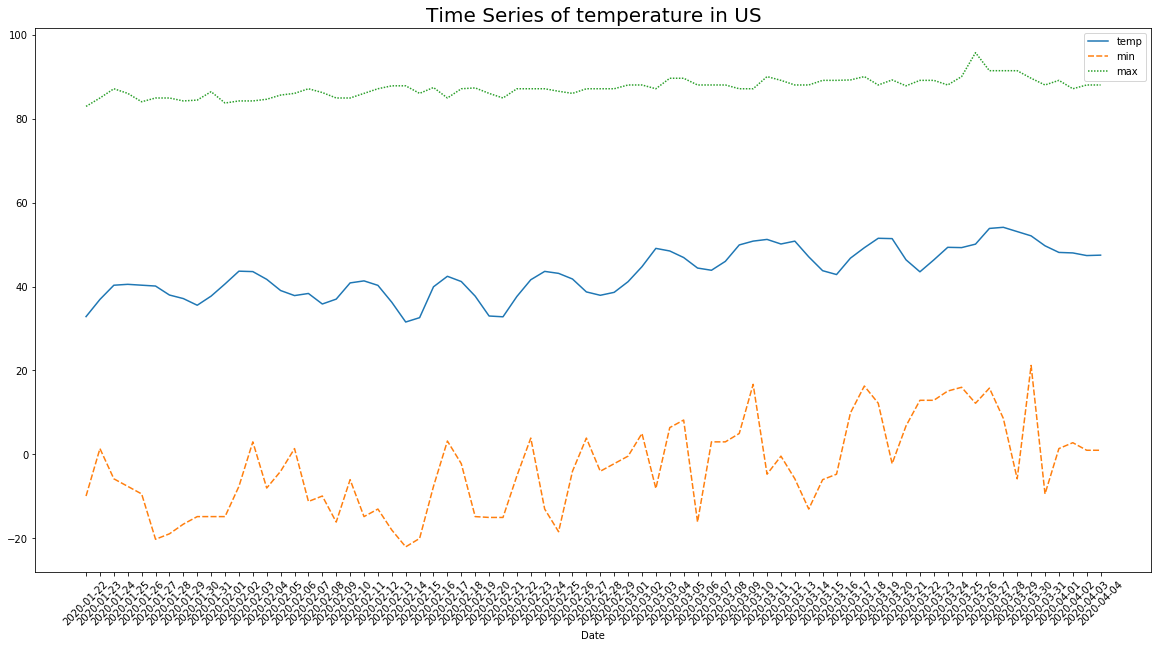

In [157]:
plot_temp_by_day('US')

In [165]:
def plot_wind_by_day(country):
    plt.figure(figsize=(20, 10))
    df = weather_df[weather_df['Country_Region']==country]
    df = df.groupby(['Date']).agg({'wdsp':'mean'}).reset_index()
    df.rename(columns={'wdsp':'wind speed'}, inplace=True)
    ax = sns.lineplot(data=df.set_index('Date')['wind speed'])
    ax.set_title('Time Series of wind speed in {}'.format(country),fontsize=20)
    plt.xticks(rotation=45)

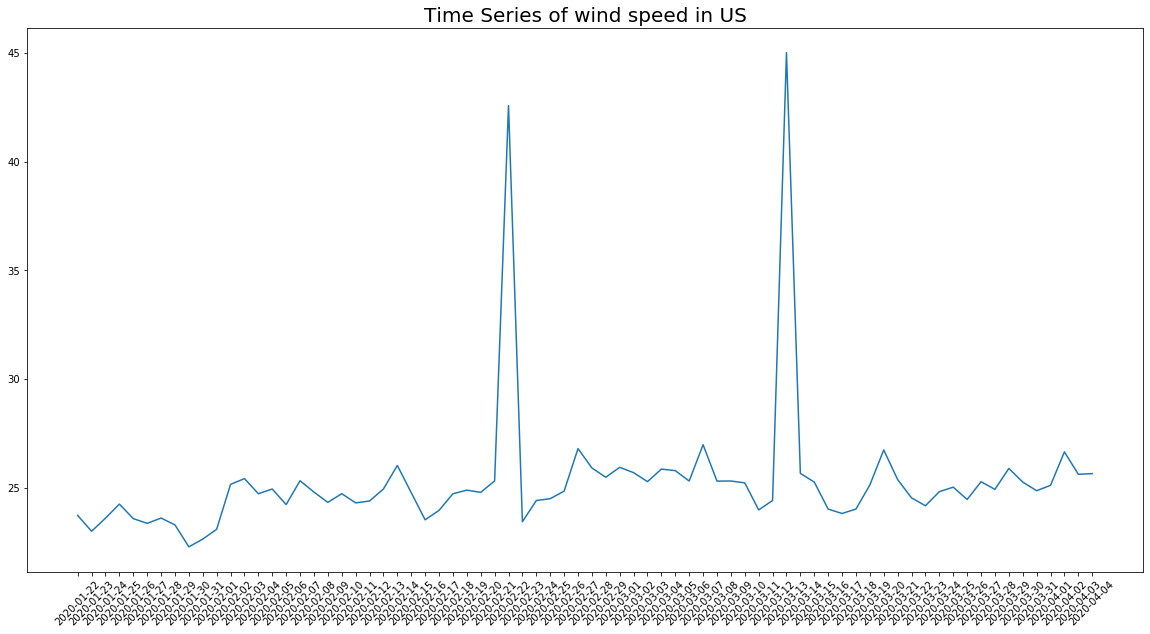

In [166]:
plot_wind_by_day('US')

In [167]:
def plot_precipitation_by_day(country):
    plt.figure(figsize=(20, 10))
    df = weather_df[weather_df['Country_Region']==country]
    df = df.groupby(['Date']).agg({'prcp':'mean'}).reset_index()
    df.rename(columns={'prcp':'precipitation'}, inplace=True)
    ax = sns.lineplot(data=df.set_index('Date')['precipitation'])
    ax.set_title('Time Series of precipitation in {}'.format(country),fontsize=20)
    plt.xticks(rotation=45)

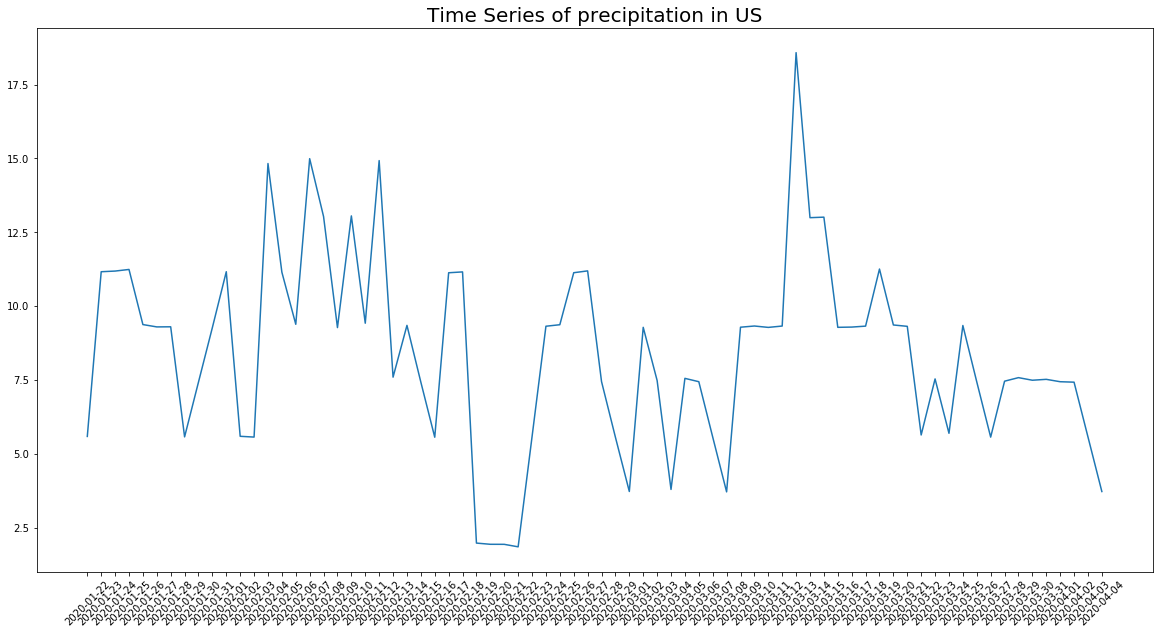

In [168]:
plot_precipitation_by_day('US')

In [169]:
def plot_pressure_by_day(country):
    plt.figure(figsize=(20, 10))
    df = weather_df[weather_df['Country_Region']==country]
    df = df.groupby(['Date']).agg({'slp':'mean'}).reset_index()
    df.rename(columns={'slp':'station pressure'}, inplace=True)
    ax = sns.lineplot(data=df.set_index('Date')['station pressure'])
    ax.set_title('Time Series of station pressure in {}'.format(country),fontsize=20)
    plt.xticks(rotation=45)

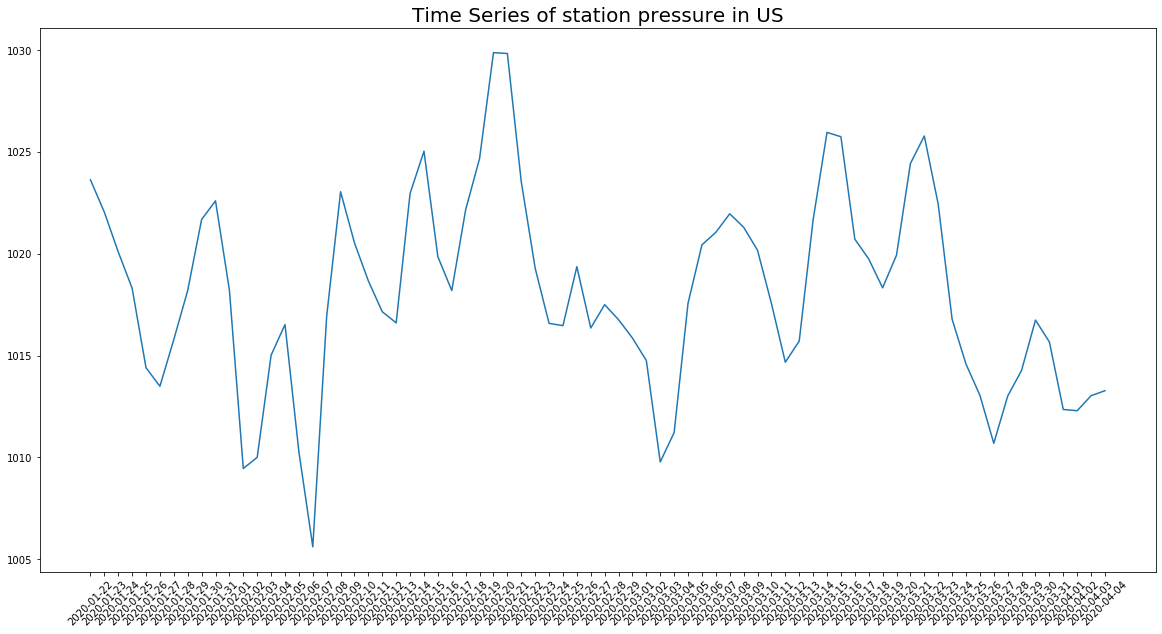

In [170]:
plot_pressure_by_day('US')

### Goverment measure

In [71]:
# gover_df = pd.read_excel("covid-19-goverment-measures.xlsx", "Database")
# gover_df = gover_df.replace('United States of America', 'US')
# gover_df = gover_df.replace('Schools closure\xa0', 'Schools closure')
# gover_df = gover_df.replace('Border closure\xa0', 'Border closure')
# gover_df = gover_df.replace('Border checks\xa0', 'Border checks')
# gover_df = gover_df.replace('Public services closure\xa0', 'Public services closure')
# gover_df.to_csv("covid-19-goverment-measures.csv", index=False)

In [92]:
gover_df = pd.read_csv("covid-19-goverment-measures.csv")
gover_df.DATE_IMPLEMENTED = pd.to_datetime(gover_df.DATE_IMPLEMENTED)
gover_df.head()

,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,1,Afghanistan,AFG,NaN,NaN,Asia,Public health measures,Health screenings in airports and border cross...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
1,2,Afghanistan,AFG,Kabul,NaN,Asia,Public health measures,Introduction of quarantine policies,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
2,3,Afghanistan,AFG,NaN,NaN,Asia,Public health measures,Awareness campaigns,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
3,4,Afghanistan,AFG,NaN,NaN,Asia,Governance and socio-economic measures,Emergency administrative structures activated ...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
4,5,Afghanistan,AFG,NaN,NaN,Asia,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,NaN,2020-03-12,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavi...,2020-03-14,NaN


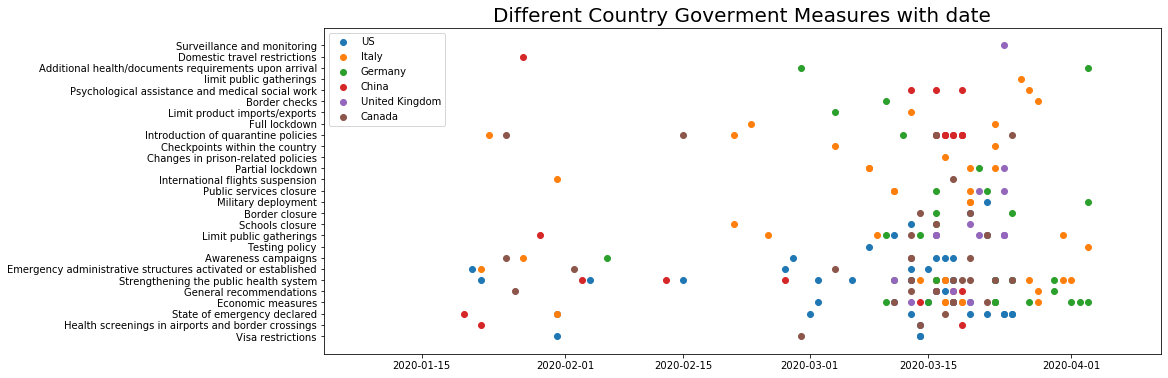

In [117]:
#clist = ['US', 'Spain', 'Italy', 'Germany', 'France', 'China', 'Ira', 'United Kingdom', 'Japan', 'Canada']
clist = ['US', 'Italy', 'Germany', 'China', 'United Kingdom', 'Canada']
fig, ax = plt.subplots(figsize=(15,6))
for country in clist:
    ax.scatter(gover_df[gover_df['COUNTRY']==country].DATE_IMPLEMENTED, gover_df[gover_df['COUNTRY']==country].MEASURE, label = country)

ax.legend()
ax.set_title("Different Country Goverment Measures with date", fontsize=20)
plt.show()